In [56]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

In [57]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

id = df[df["gender"] == "Other"].index
df = df.drop(id)

# supprimer les lignes avec work_type = "Never_worked"
id = df[df["work_type"] == "Never_worked"].index
df = df.drop(id)

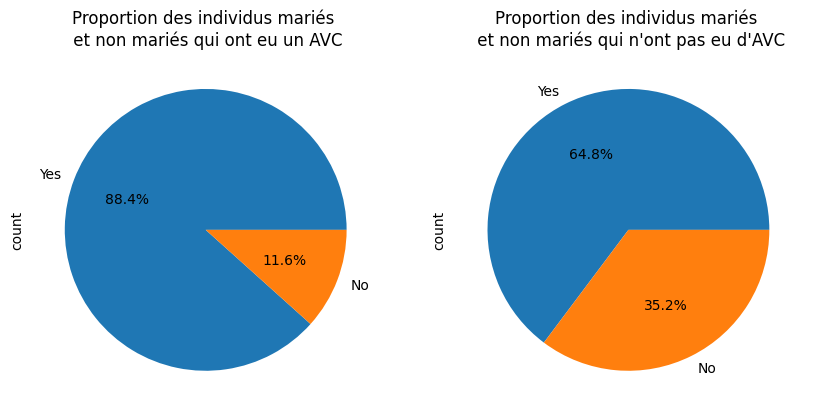

In [58]:
# En étudiant la base de données, nous nous sommes demandé si la colonne “ever_married”, c’est-à-dire le fait d’être marié, avait un impact sur le risque d’avoir un AVC. Le graphique ci-dessous va nous permettre de représenter la corrélation entre les colonnes “ever_maried” et “stroke”. 

# Pour la représentation ne soit pas biaisée on regarde la proportion des individus mariés et non mariés qui ont eu un AVC puis sur la même figure on regarde la proportion des individus mariés et non mariés qui n'ont pas eu d'AVC.
# subplot avec 2 camemberts
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# on récupère tous les individus qui ont eu un AVC
df_stroke = df[df["stroke"] == 1]
# on représente la proportion des individus mariés et non mariés qui ont eu un AVC
df_stroke["ever_married"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Proportion des individus mariés \n et non mariés qui ont eu un AVC")
# on représente la proportion des individus mariés et non mariés qui n'ont pas eu d'AVC
df_no_stroke = df[df["stroke"] == 0]
df_no_stroke["ever_married"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[1])
ax[1].set_title("Proportion des individus mariés \n et non mariés qui n'ont pas eu d'AVC")
plt.show()

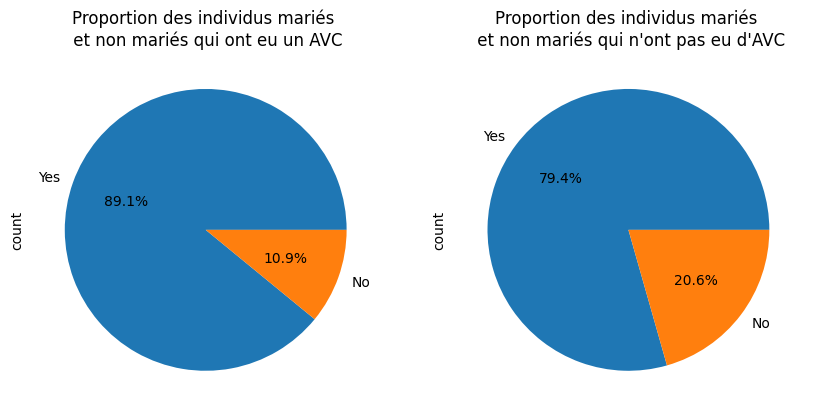

In [59]:
# Attention cependant, le fait d’être marié dépend de l’âge. Donc pour avoir des diagrammes plus représentatifs, nous allons sélectionner les personnes ayant un âge inférieur à 18 ans.
df_adult = df[df["age"] > 18]
df_adult_stroke = df_adult[df_adult["stroke"] == 1]
df_adult_no_stroke = df_adult[df_adult["stroke"] == 0]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_adult_stroke["ever_married"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Proportion des individus mariés \n et non mariés qui ont eu un AVC")
df_adult_no_stroke["ever_married"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[1])
ax[1].set_title("Proportion des individus mariés \n et non mariés qui n'ont pas eu d'AVC")
plt.show()

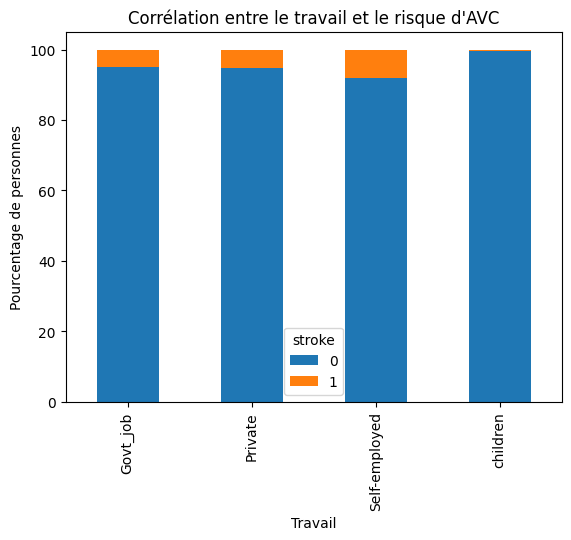

In [60]:
# De la même manière, quel est le lien entre le type d’emploi de l'individu et son risque d’avoir un AVC ? 
df_work_type = df.groupby("work_type")["stroke"].value_counts(normalize=True).unstack() * 100
df_work_type.plot(kind="bar", stacked=True)
plt.title("Corrélation entre le travail et le risque d'AVC")
plt.xlabel("Travail")
plt.ylabel("Pourcentage de personnes")
plt.show()

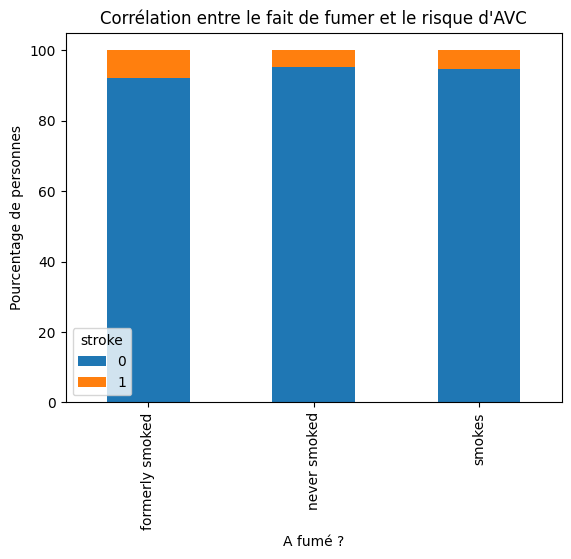

In [61]:
# Enfin, fumer affecte-t-il la probabilité de faire un AVC ?
# Attention, la colonne "smoking_status" contient des valeurs manquantes. On a donc décidé de ne pas les afficher car elles ne nous permettent pas de tirer des conclusions.
df_smoking_status = df[df["smoking_status"] != "Unknown"]
df_smoking_status = df_smoking_status.groupby("smoking_status")["stroke"].value_counts(normalize=True).unstack() * 100
df_smoking_status.plot(kind="bar", stacked=True)
plt.title("Corrélation entre le fait de fumer et le risque d'AVC")
plt.xlabel("A fumé ?")
plt.ylabel("Pourcentage de personnes")
plt.show()

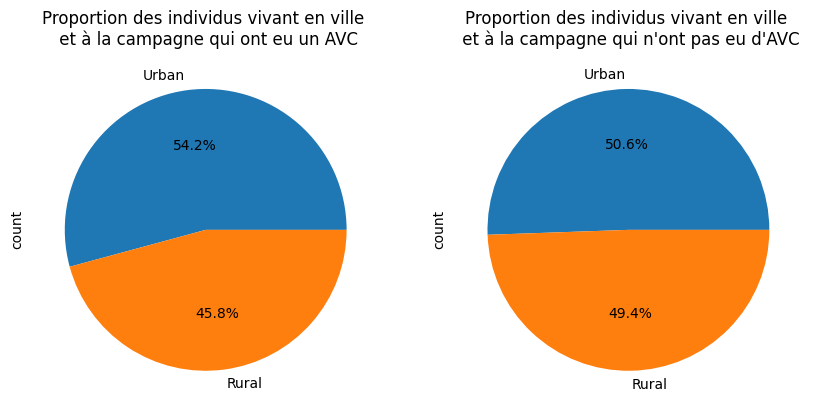

In [62]:
# Avant de traiter les données, on s’est tous dit que c’était évident qu’il existait une corrélation entre le lieu de résidence de l’individu et son risque de faire un AVC, est-ce-que les données de la base confirment cette idée ?  
# on fait comme pour l'étude de la corélation entre le fait d'être marié et le risque d'AVC
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_stroke = df[df["stroke"] == 1]
df_stroke["Residence_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[0])
ax[0].set_title("Proportion des individus vivant en ville \n et à la campagne qui ont eu un AVC")
df_no_stroke = df[df["stroke"] == 0]
df_no_stroke["Residence_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', ax=ax[1])
ax[1].set_title("Proportion des individus vivant en ville \n et à la campagne qui n'ont pas eu d'AVC")
plt.show()

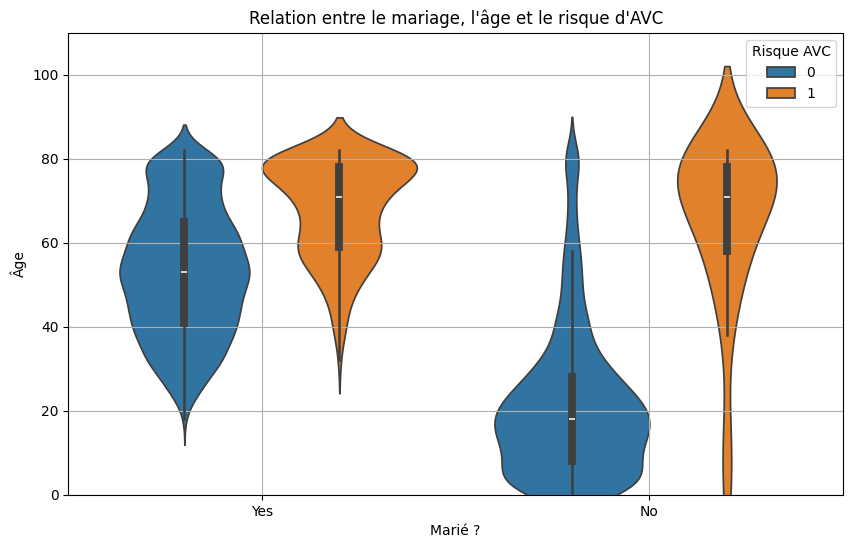

In [81]:
# Ici le diagramme réprésente la proportion des personnes ayant eu un AVC en fonction de leur âge ainsi que le fait d'être marié ou non.
plt.figure(figsize=(10, 6))
plt.ylim(0, 110)
sns.violinplot(x='ever_married', y='age', hue='stroke', data=df)
plt.xlabel('Marié ?')
plt.ylabel('Âge')
plt.title('Relation entre le mariage, l\'âge et le risque d\'AVC')
plt.legend(title='Risque AVC')
plt.grid(True)
plt.show()

In [97]:
# Le lieu de vie, le travail et la famille peuvent influencer le taux de stress, un changement de mode de vie et de lieu de vie. Voyons si ces caractères ont un impact important sur le risque d’avoir un AVC. 

df = df[df["age"] > 18]
grouped = df.groupby(["Residence_type", "work_type", "ever_married"])["stroke"].mean().reset_index()

fig = px.scatter(grouped, x="Residence_type", y="work_type",
                 size="stroke", color="ever_married",
                 hover_name="Residence_type", facet_col="ever_married",
                 title="Impact du lieu de vie, du travail et du statut matrimonial sur le risque d'AVC",
                 labels={"stroke": "Pourcentage d'AVC", "Residence_type": "Lieu de vie", "work_type": "Travail"},
                 width=800, height=600)
fig.update_layout(showlegend=False)
fig.show()